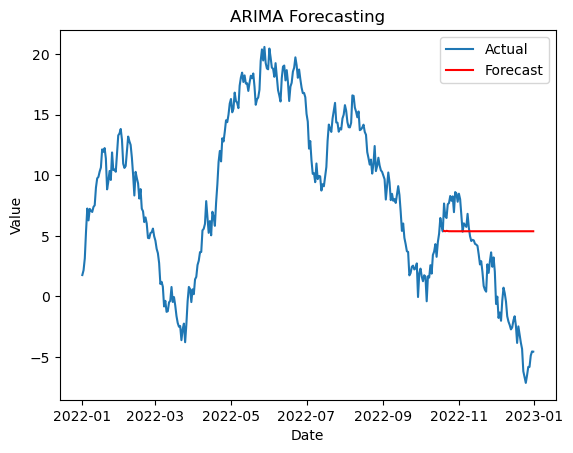

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = pd.DataFrame({'date': date_range,
                     'value': np.random.randn(len(date_range)).cumsum()})
data.set_index('date', inplace=True)
data_resampled = data.resample('D').mean().fillna(method='ffill')
train_size = int(len(data_resampled) * 0.8)
train_data, test_data = data_resampled.iloc[:train_size], data_resampled.iloc[train_size:]
order = (5, 1, 0)
model = ARIMA(train_data, order=order)
model_fit = model.fit()
forecast_values = model_fit.forecast(steps=len(test_data))
plt.plot(data_resampled.index, data_resampled['value'], label='Actual')
plt.plot(test_data.index, forecast_values, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()


C:\Users\jayan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jayan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\jayan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jayan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\jayan\anaconda3\Lib\s

Best ARIMA parameters: (2, 1, 2)


C:\Users\jayan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error: 4.647368410535904
Root Mean Squared Error: 5.768914555897522


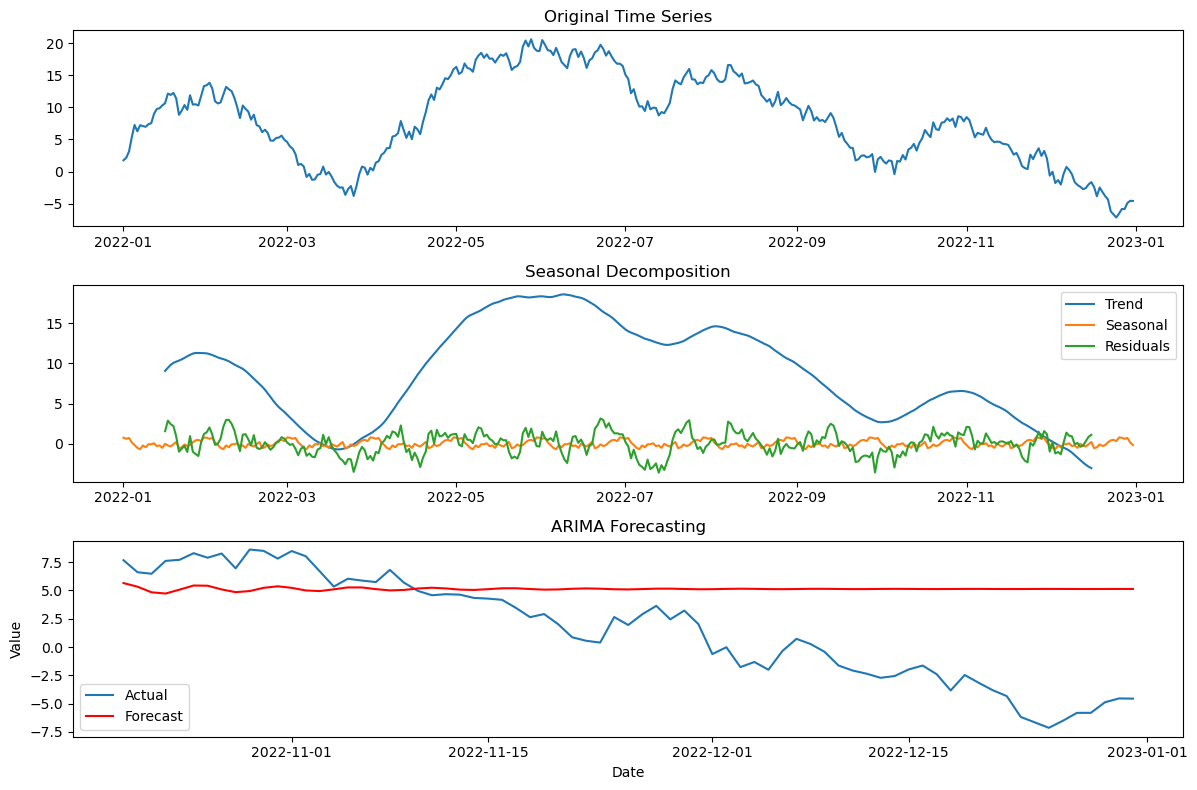

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = pd.DataFrame({'date': date_range,
                     'value': np.random.randn(len(date_range)).cumsum()})
data.set_index('date', inplace=True)
data_resampled = data.resample('D').mean().fillna(method='ffill')
decomposition = seasonal_decompose(data_resampled['value'], model='additive', period=30)  
train_size = int(len(data_resampled) * 0.8)
train_data, test_data = data_resampled.iloc[:train_size], data_resampled.iloc[train_size:]
best_mae = float('inf')
best_order = None
for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model = ARIMA(train_data, order=(p, d, q))
                model_fit = model.fit()
                forecast_values = model_fit.forecast(steps=len(test_data))
                mae = mean_absolute_error(test_data, forecast_values)
                if mae < best_mae:
                    best_mae = mae
                    best_order = (p, d, q)
            except:
                continue

print("Best ARIMA parameters:", best_order)
model = ARIMA(train_data, order=best_order)
model_fit = model.fit()
forecast_values = model_fit.forecast(steps=len(test_data))
mae = mean_absolute_error(test_data, forecast_values)
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data_resampled.index, data_resampled['value'], label='Actual')
plt.title('Original Time Series')
plt.subplot(3, 1, 2)
plt.plot(data_resampled.index, decomposition.trend, label='Trend')
plt.plot(data_resampled.index, decomposition.seasonal, label='Seasonal')
plt.plot(data_resampled.index, decomposition.resid, label='Residuals')
plt.title('Seasonal Decomposition')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast_values, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecasting')
plt.legend()
plt.tight_layout()
plt.show()
